In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
from spacy.lang.en.stop_words import STOP_WORDS

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df = pd.read_csv("data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [3]:
df["word_count"] = df["text"].str.split().apply(len)
df.head()

,id,text,author,word_count
0,id26305,"This process, however, afforded me no means of...",EAP,41
1,id17569,It never once occurred to me that the fumbling...,HPL,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27


In [4]:
total_wc = df.groupby("author").sum()
total_wc

,word_count
author,
EAP,200995
HPL,156651
MWS,165710


<BarContainer object of 3 artists>

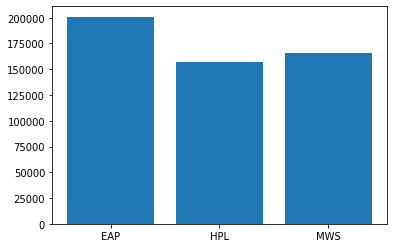

In [5]:
plt.bar(total_wc.index, total_wc["word_count"])

In [6]:
avg_wc = df.groupby("author").mean()
avg_wc.rename({"word_count": "Average word count"})

,word_count
author,
EAP,25.442405
HPL,27.799645
MWS,27.417273


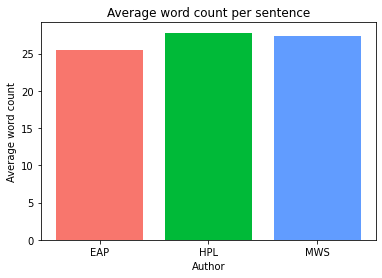

In [7]:
plt.bar(total_wc.index, avg_wc["word_count"], color=[(0.972, 0.463, 0.427), (0, 0.729, 0.219), (0.38, 0.612, 1)])
plt.title("Average word count per sentence")
plt.xlabel("Author")
plt.ylabel("Average word count")
plt.show()

In [8]:
def make_wordcloud(author: str, mask, colormap):
    stopwords = set(STOP_WORDS)
    text = " ".join(review for review in df[df["author"]== author].text)
    wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=10000, mask=mask).generate(text)
    plt.figure(figsize=(10,14))
    plt.imshow(wordcloud.recolor( colormap= colormap), interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.close()

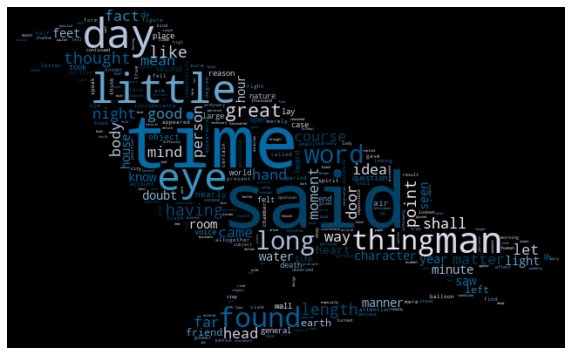

In [9]:
mask = np.array(Image.open("eap.png"))
make_wordcloud("EAP", mask, "PuBu")

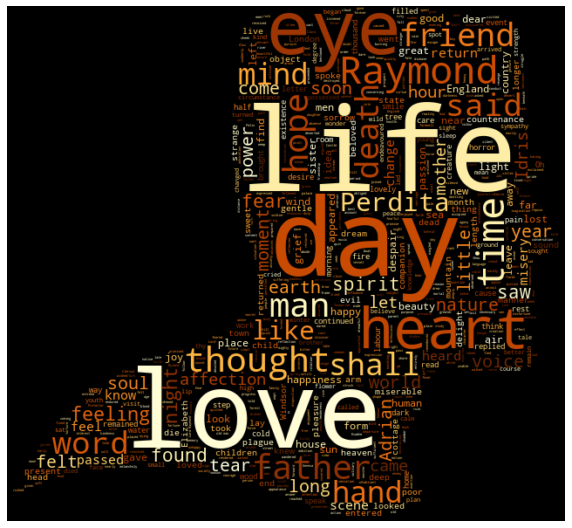

In [10]:
mask = np.array(Image.open("mws.png"))
make_wordcloud("MWS", mask, "YlOrBr_r")

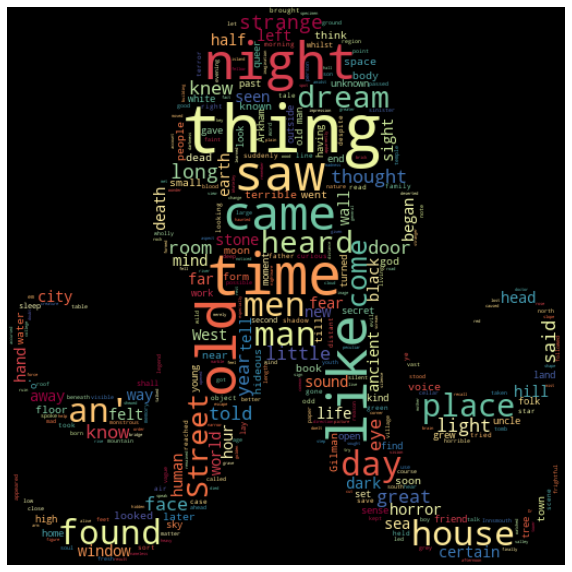

In [11]:
mask = np.array(Image.open("hpl.png"))
make_wordcloud("HPL", mask, "Spectral_r")